In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [33]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [34]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(267,)

In [35]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(267, 50, 50)

In [36]:
# plt.figure()
# plt.imshow(imgs[0])
# plt.grid(False)
# plt.show()

In [37]:
imgs = np.expand_dims(imgs, -1)

In [38]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [39]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [40]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [41]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
13/13 [==============================] - 33s 2s/step - loss: 3.3262 - accuracy: 0.0400 - val_loss: 3.1069 - val_accuracy: 0.1194
Epoch 2/20
13/13 [==============================] - 48s 4s/step - loss: 2.0042 - accuracy: 0.4700 - val_loss: 1.8830 - val_accuracy: 0.5224
Epoch 3/20
13/13 [==============================] - 45s 3s/step - loss: 0.6963 - accuracy: 0.7900 - val_loss: 0.9417 - val_accuracy: 0.7015
Epoch 4/20
13/13 [==============================] - 40s 3s/step - loss: 0.3589 - accuracy: 0.9000 - val_loss: 0.4355 - val_accuracy: 0.9104
Epoch 5/20
13/13 [==============================] - 41s 3s/step - loss: 0.1298 - accuracy: 0.9550 - val_loss: 0.9505 - val_accuracy: 0.8507
Epoch 6/20
13/13 [==============================] - 40s 3s/step - loss: 0.1223 - accuracy: 0.9600 - val_loss: 0.3014 - val_accuracy: 0.9552
Epoch 7/20
13/13 [==============================] - 46s 4s/step - loss: 0.0455 - accuracy: 0.9850 - val_loss: 0.2195 - val_accuracy: 0.9552
Epoch 8/20
13/13 [==

In [42]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

3/3 [==============================] - 3s 654ms/step


In [43]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

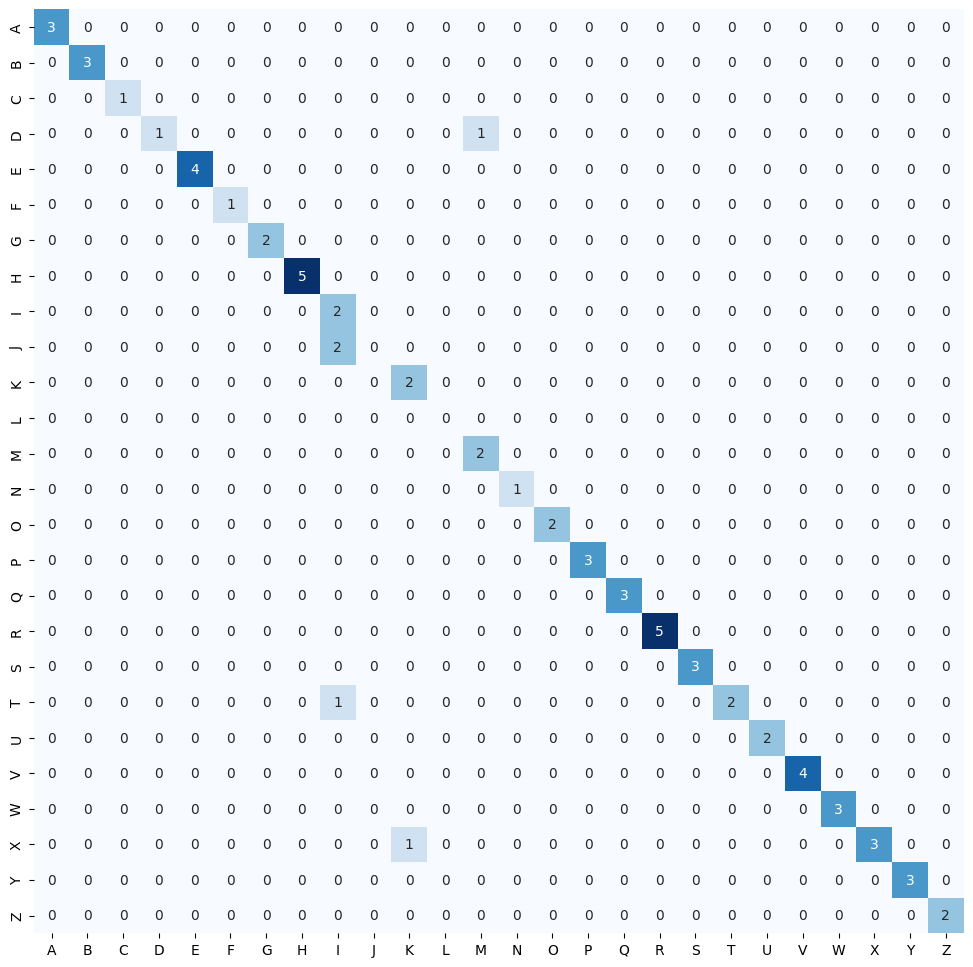

In [44]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [45]:
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets
